In [68]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [69]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [70]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [71]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [72]:
# reflect an existing database into a new model
db= automap_base()
# reflect the tables
db.prepare(engine, reflect=True)

In [73]:
# View all of the classes that automap found
db.classes.keys()

['measurement', 'station']

In [74]:
# Save references to each table
dbstation= db.classes.station
dbmeasurement= db.classes.measurement

In [75]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [76]:
# Find the most recent date in the data set.
recent= (session.query(dbmeasurement.date).order_by(dbmeasurement.date.desc()).first())
recent

('2017-08-23',)

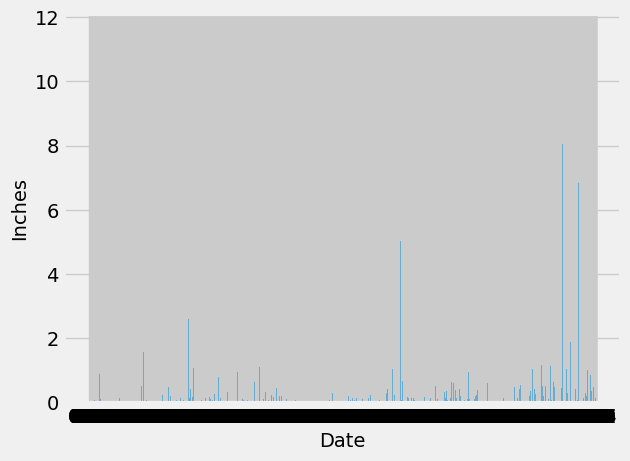

In [49]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_before= dt.date(2017,8,23)-dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
precipitation_scores= (session.query(dbmeasurement.date,(dbmeasurement.prcp)).filter(func.strftime('%Y-%m-%d',dbmeasurement.date)).all())

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df= pd.DataFrame(precipitation_scores, columns=['date', 'prcp'])

# Sort the dataframe by date
precipitation_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
x= precipitation_df['date']
y_pos=np.arange(len(x))
y=precipitation_df['prcp']
plt.bar(y_pos,y, align='center', alpha=0.5)
plt.xticks(y_pos, y)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [77]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_stats= (session.query(dbmeasurement.date,(dbmeasurement.prcp)).filter(dbmeasurement.date).all())
precipitation_stats_df= pd.DataFrame(precipitation_stats, columns=['date', 'prcp'])
precipitation_stats_df.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [78]:
# Design a query to calculate the total number of stations in the dataset
total= session.query(dbstation).count()
total

9

In [53]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active= (session.query(dbmeasurement.station, func.count(dbmeasurement.station)).group_by(dbmeasurement.station).order_by(func.count(dbmeasurement.station).desc()).all())
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [79]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature
stat= [dbmeasurement.station, func.min(dbmeasurement.tobs), func.max(dbmeasurement.tobs), func.avg(dbmeasurement.tobs)]
active_stat=(session.query(*stat).filter(dbmeasurement.station=='USC00519281').all())
active_stat

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

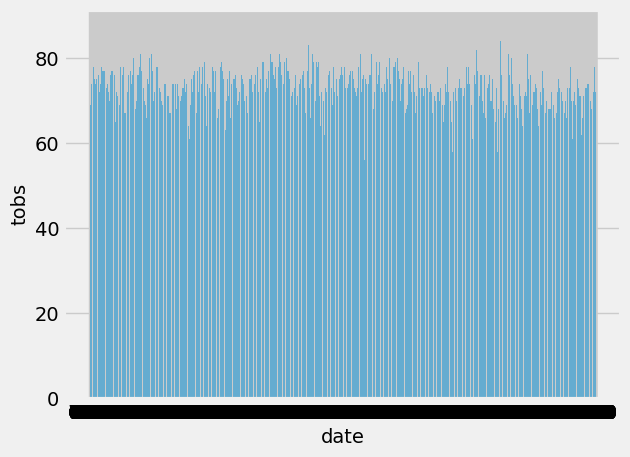

In [82]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_stats= (session.query(dbmeasurement.date, (dbmeasurement.tobs)).filter(func.strftime(dbmeasurement.date)).all())
active_stats_df= pd.DataFrame(active_stats)

x= active_stats_df['date']
y_pos=np.arange(len(x))
y= active_stats_df['tobs']
plt.bar(y_pos,y, align='center', alpha=0.5)
plt.xticks(y_pos, y)
plt.xlabel('date')
plt.ylabel('tobs')
plt.show()

# Close Session

In [83]:
# Close Session
session.close()